In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

with tf.device("/gpu:0"):
    np.random.seed(3)
    tf.random.set_seed(3)

In [24]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")


train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [30]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [25]:
train_x = train.drop("target", axis=1, inplace=False)
train_y = train["target"]

In [26]:
train_x.head(3)


,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'samples')

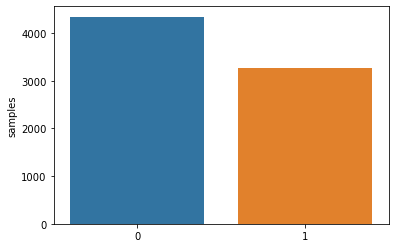

In [27]:
x = train_y.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel("samples")

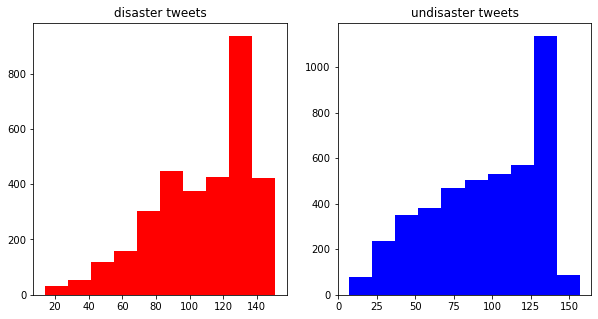

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
text_len = train[train['target'] == 1]['text'].str.len()
ax1.hist(text_len, color='red')
ax1.set_title('disaster tweets')

text_len = train[train['target'] == 0]['text'].str.len()
ax2.hist(text_len, color='blue')
ax2.set_title('undisaster tweets')

plt.show()

text length

Text(0.5, 1.0, 'undisaster tweets')

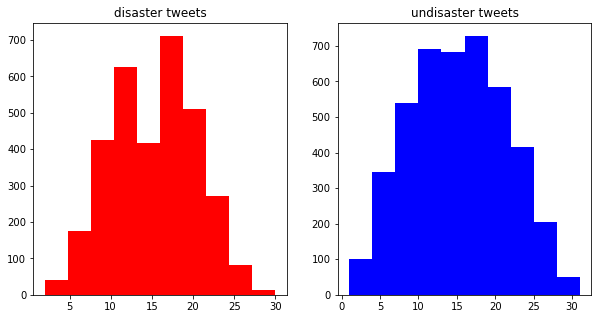

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
text_len = train[train['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('disaster tweets')

text_len = train[train['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('undisaster tweets')

num of word

In [31]:
train_x[""]
for x in train_x: 
    train_x[x] = train_x[x].lower()

AttributeError: 'Series' object has no attribute 'lower'